In [44]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20,10)

In [45]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [46]:
#examine the shape of the dataset 
df1.shape

(13320, 9)

In [47]:
#count the area type feature 
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [48]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [49]:
#count the number of null rows 
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [50]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [51]:
df3.shape

(13246, 5)

In [52]:
#check the unique values 
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [53]:
#create the bhk that contains the number of bedrooms 
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Chris Victor\AppData\Local\Temp\ipykernel_22328\701062130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [54]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [55]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [56]:
df3[~df3['total_sqft'].apply(is_float)].head(100)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
6552,5 Bedroom Farm House in Lakshmipura,5 Bedroom,24Guntha,6.0,550.000,5
6581,Sarjapur Road,3 BHK,1270 - 1275,2.0,40.720,3
6587,Kadugodi,1 BHK,840 - 1010,1.0,40.700,1
6592,Langford Town,4 BHK,697Sq. Meter,4.0,211.000,4


In [57]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) /2 
    try:
        return float(x)
    except:
        return None
    


In [58]:
convert_sqft_to_num('2166')

2166.0

In [59]:
convert_sqft_to_num('2100sqmeter')

In [60]:
#apply the function on sqfoot function 
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [61]:
df4.head(100)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3 BHK,1330.0,2.0,48.00,3
98,Devasthanagalu,2 BHK,1200.0,2.0,65.00,2
99,T Dasarahalli,3 Bedroom,1200.0,3.0,90.00,3
100,Yeshwanthpur,3 BHK,2502.0,3.0,138.00,3


In [62]:
df5 = df4.copy()

In [63]:
#create a new feature price per sqft 

df5['price_per_sqft'] = df5['price'] *100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [64]:
len(df5.location.unique())

1304

In [65]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [66]:
len(location_stats[location_stats <= 10])

1052

In [67]:
location_stats_less_10 = location_stats[location_stats <= 10]
location_stats_less_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [68]:
df5.location = df5.location.apply(lambda x: 'other' if x  in location_stats_less_10 else x )
len(df5.location.unique())

242

In [69]:
df5.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [70]:
df5[df5.total_sqft/df5.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [71]:
df5.shape


(13246, 7)

In [72]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12502, 7)

In [73]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [74]:
#remove outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

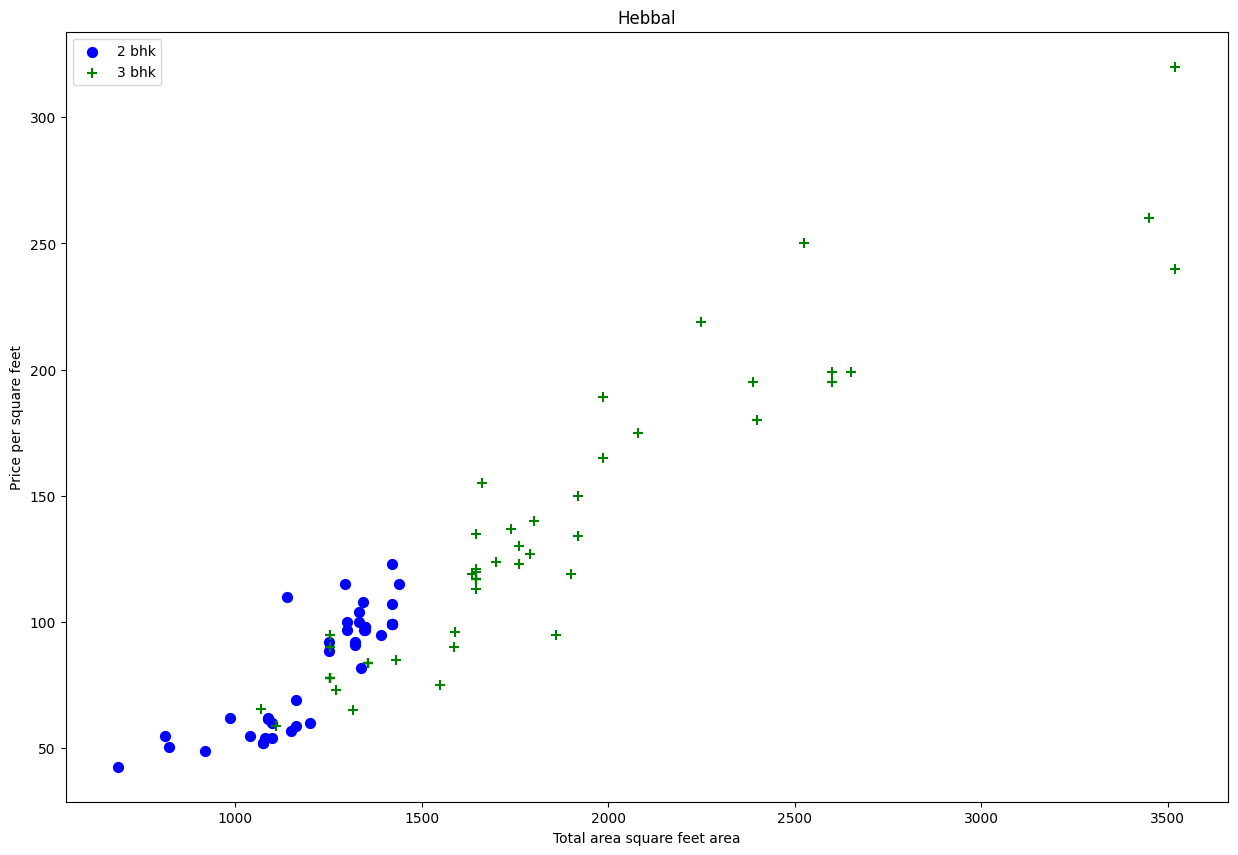

In [80]:
#create a function that will visualise the 2 bedrooms and three bedrooms apartment 

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker ='+', color='green', label='3 bhk', s=50)
    plt.xlabel('Total area square feet area')
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()
    plt.show()


plot_scatter_chart(df7,'Hebbal')

In [81]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape


(7329, 7)

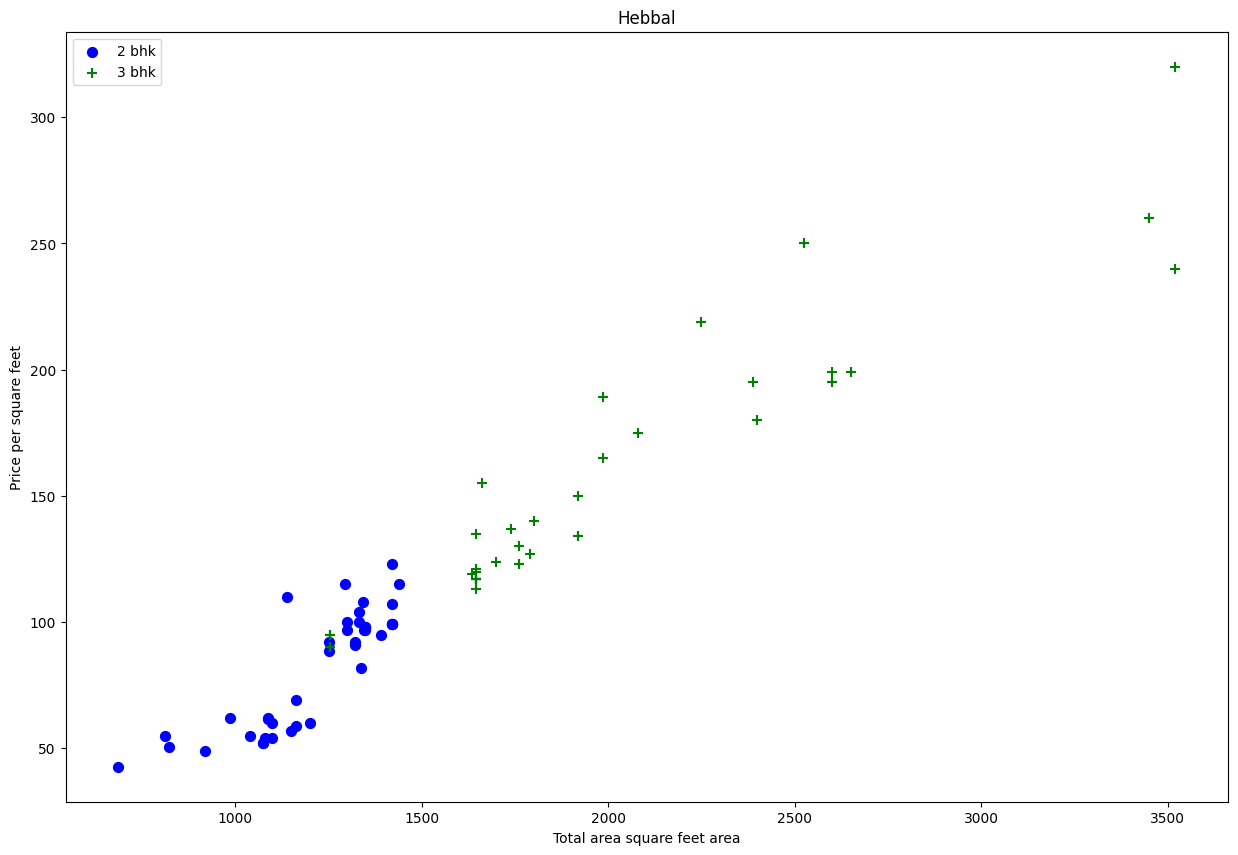

In [82]:
plot_scatter_chart(df8, 'Hebbal')

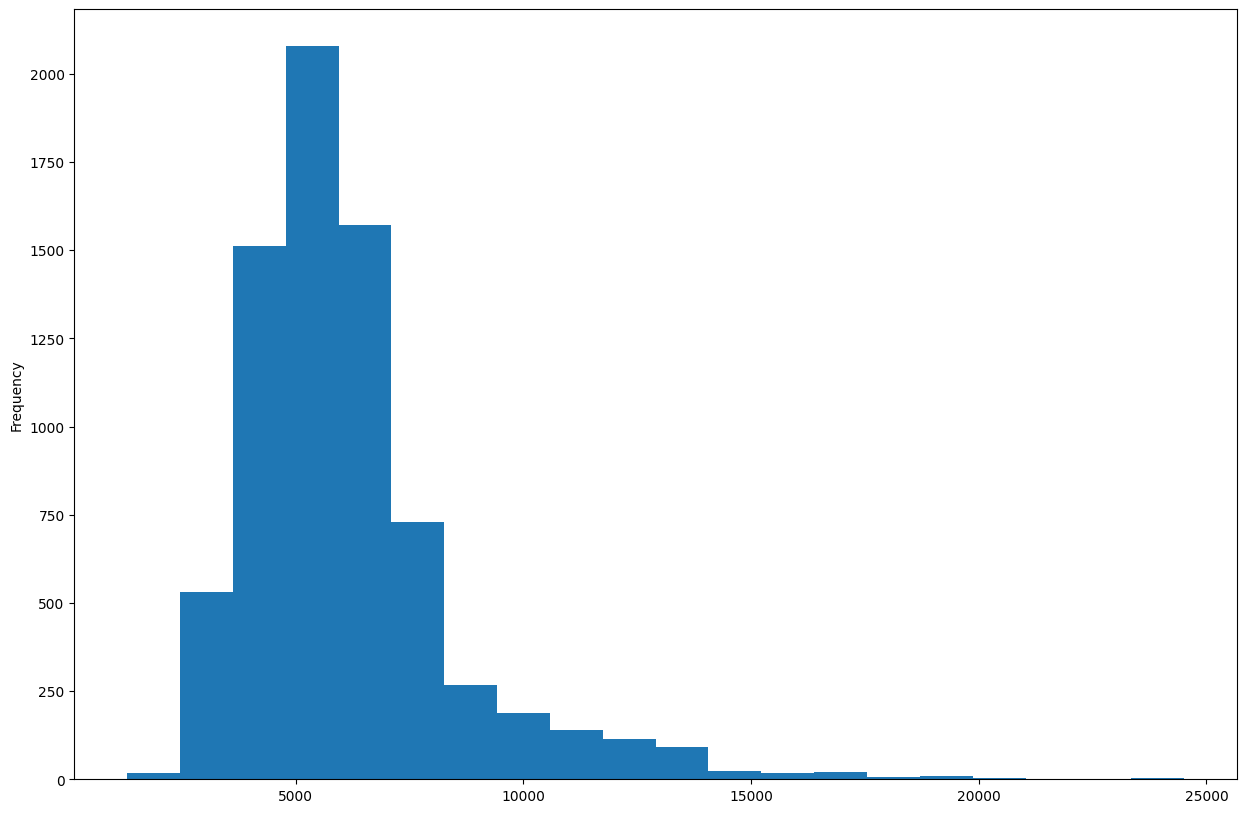

In [86]:
df8['price_per_sqft'].plot(kind='hist', bins=20)
plt.show()

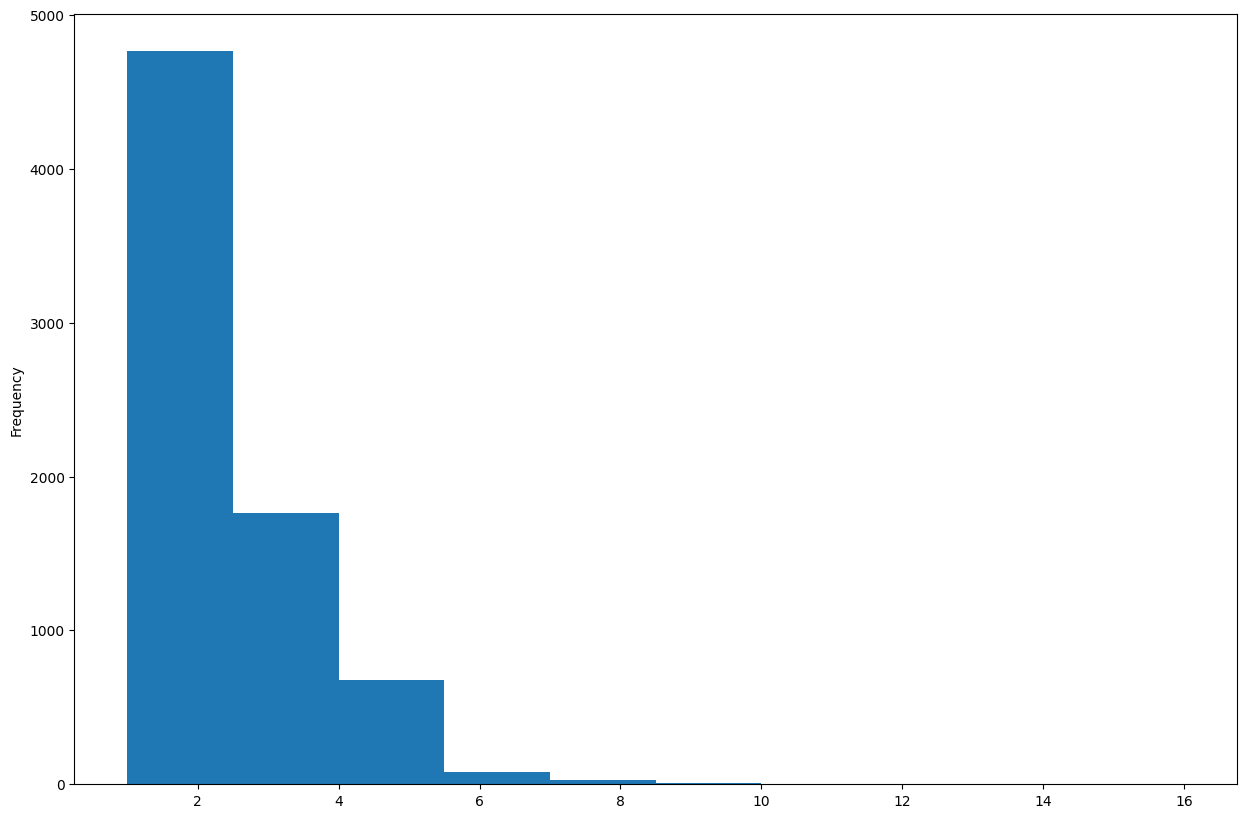

In [87]:
df8.bath.plot(kind='hist')
plt.show()

In [88]:
df9 = df8[df8.bath < df8.bhk +2]
df9.shape

(7251, 7)

In [89]:
df10 = df9.drop(columns=['size', 'price_per_sqft'])
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [95]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,other,1800.0,1.0,200.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,other,1353.0,2.0,110.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,other,812.0,1.0,26.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df12= df11.drop('location', axis='columns')
df12.shape

(7251, 245)

In [98]:
X = df12.drop(columns='price')
y = df12.price
X.shape

(7251, 244)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874349

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linearRegression': {'model': LinearRegression(),
                             'params': {'fit_intercept': [True, False],
                'positive': [True, False]}},
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }

        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X_train, y_train)



C:\Users\Chris Victor\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Chris Victor\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Chris Victor\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Chris Victor\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in 

,model,best_score,best_params
0,linearRegression,0.832907,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.689078,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.717754,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [104]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [107]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

C:\Users\Chris Victor\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395220996)

In [108]:
import pickle 
with open ('bangalore_house_price_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [110]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))